In [8]:
# import libraries
import numpy as np # Numerical computing -> Pandas was built under numpy
import pandas as pd # for data analysis and sometime for visualization
from matplotlib import pyplot as plt # For visualization 
import matplotlib.pyplot as plt
import seaborn as sns # for visualization -> under matplotlib

from sklearn import metrics # for evaluation of models performances
from sklearn.metrics import f1_score # for model performance
from sklearn.impute import SimpleImputer # fill missing values
from sklearn.model_selection import train_test_split # dividing the data into traning (model was built), test data is used to test the model
from sklearn.preprocessing import StandardScaler # convert the numerical data into the range btw 0 and 1
from imblearn.over_sampling import SMOTE 
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import OneHotEncoder # creating dummy variable
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [9]:
# load train transaction data
train_transaction = pd.read_csv('../data/train_transaction.csv')

In [10]:
#check the top 5 records in the dataset 

train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#check the last 5 records in the dataset 

train_transaction.tail()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590539,3577539,0,15811131,279.95,W,15066,170.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
train_transaction.shape

(590540, 394)

In [13]:
# load train identity data
train_identity = pd.read_csv('../data/train_identity.csv')

train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [14]:
train_identity.tail()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
144228,3577521,-15.0,145955.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,F3111 Build/33.3.A.1.97
144229,3577526,-5.0,172059.0,NaN,NaN,1.0,-5.0,NaN,NaN,NaN,...,chrome 55.0 for android,32.0,855x480,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F
144230,3577529,-20.0,632381.0,NaN,NaN,-1.0,-36.0,NaN,NaN,NaN,...,chrome 65.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152
144231,3577531,-5.0,55528.0,0.0,0.0,0.0,-7.0,NaN,NaN,0.0,...,chrome 66.0,24.0,2560x1600,match_status:2,T,F,T,F,desktop,MacOS
144232,3577534,-45.0,339406.0,NaN,NaN,-10.0,-100.0,NaN,NaN,NaN,...,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,RNE-L03 Build/HUAWEIRNE-L03


In [15]:
#checking the column name of the dataset 
train_transaction.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

In [16]:
# merging different datasources together as one dataset
df = pd.merge(train_transaction, train_identity, how='left')

In [17]:
#check the top 5 records of the new dataframe
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [18]:
#checking the rows and columns of the new dataset 
df.shape

(590540, 434)

In [19]:
#check the target values, shows imbalance class 
df['isFraud'].value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

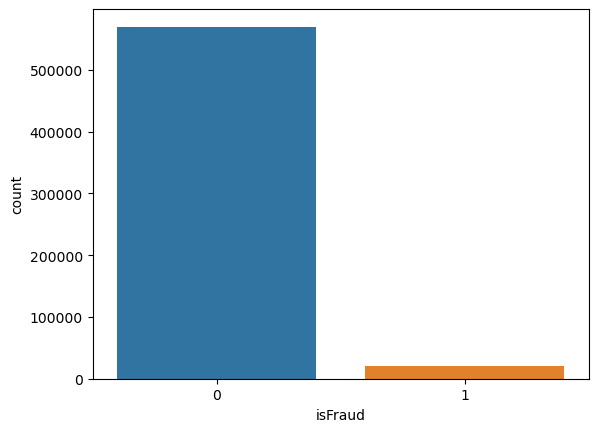

In [20]:
#plot a countplot to see the target 
sns.countplot(x = "isFraud", data = df)
plt.show()

In [21]:
#check for missing values 
df.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
id_36             449555
id_37             449555
id_38             449555
DeviceType        449730
DeviceInfo        471874
Length: 434, dtype: int64

In [22]:
#check for some stastistical result using describe method
df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


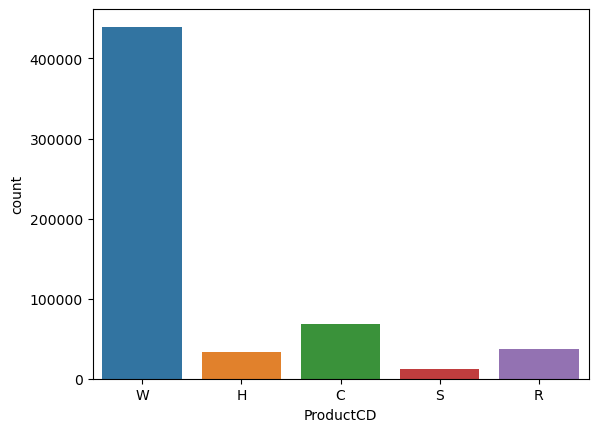

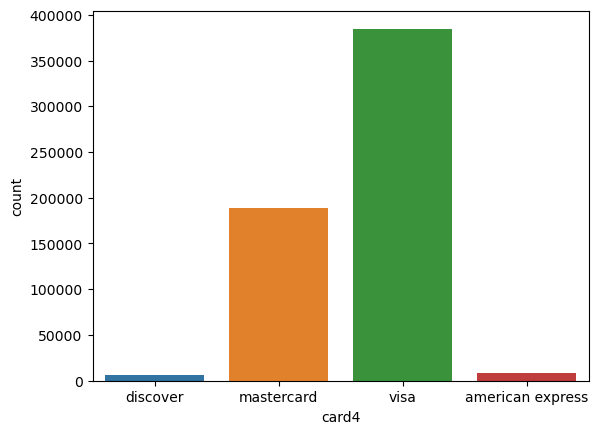

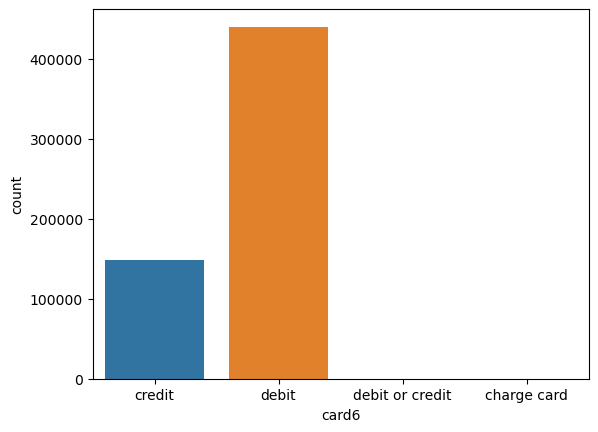

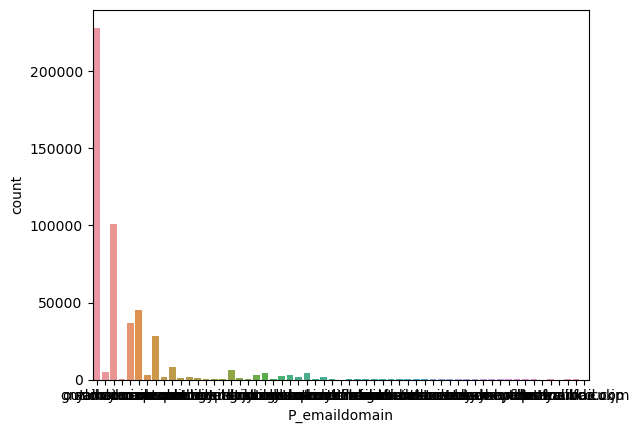

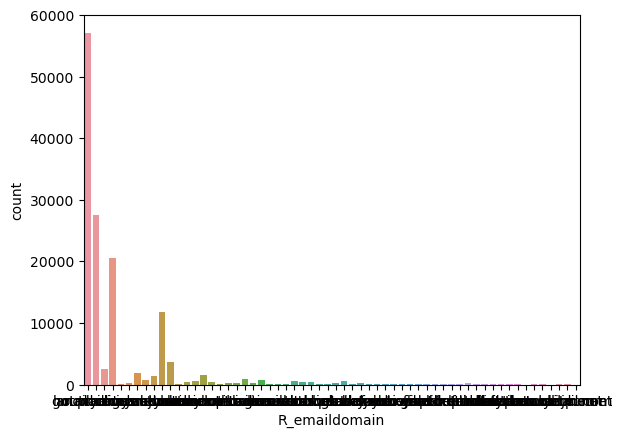

In [23]:
#plot count plot for some selected categorcial features 
cat_cols = ['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain']
for col in cat_cols:
    sns.countplot(x=col, data=df)
    plt.show()

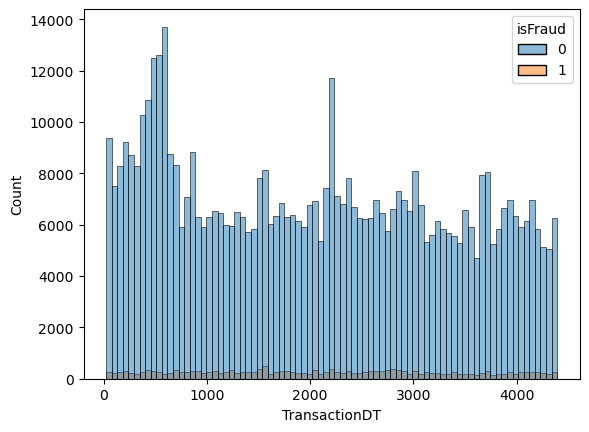

In [24]:
#created a new feature and plot an histogram over the target isfraud as hue 
df['TransactionDT'] = df['TransactionDT'] / (60*60) # convert to hours
sns.histplot(x="TransactionDT", hue="isFraud", data=df)
plt.show()

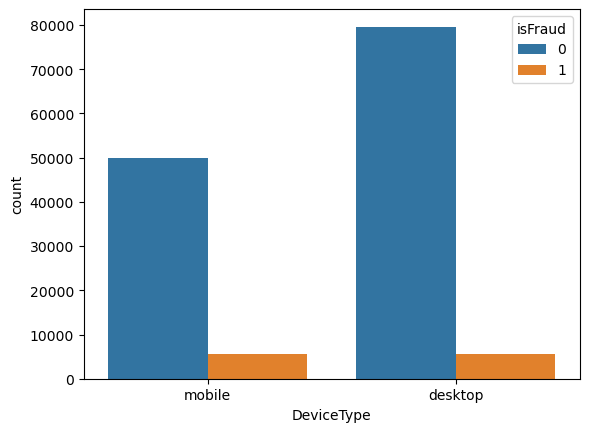

In [25]:
#check the devicetype over the fraud 
sns.countplot(x="DeviceType", hue="isFraud", data=df)
plt.show()


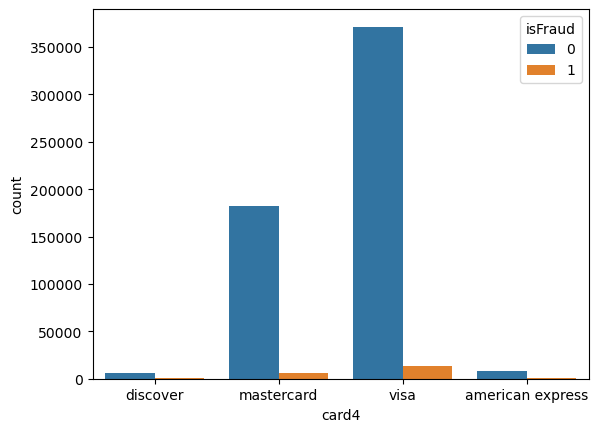

In [26]:
#check the card type over the fraud 
sns.countplot(x="card4", hue="isFraud", data=df)
plt.show()

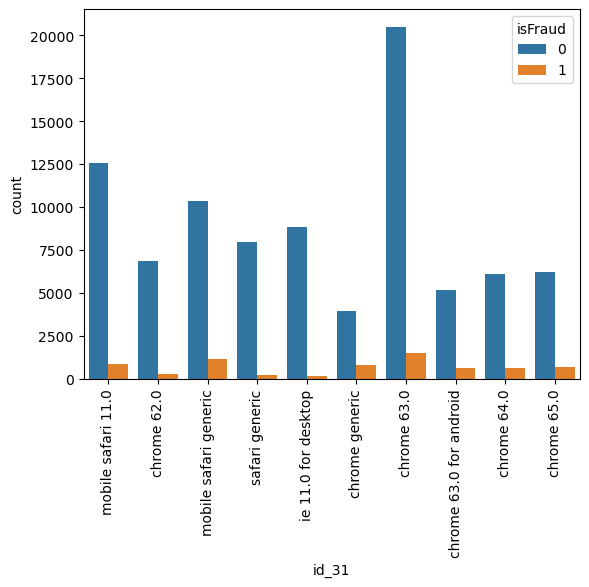

In [27]:
#top browser
top_10_id_31 = df['id_31'].value_counts().head(10).index.tolist()

sns.countplot(x="id_31", hue="isFraud", data=df[df['id_31'].isin(top_10_id_31)])
plt.xticks(rotation=90)
plt.show()

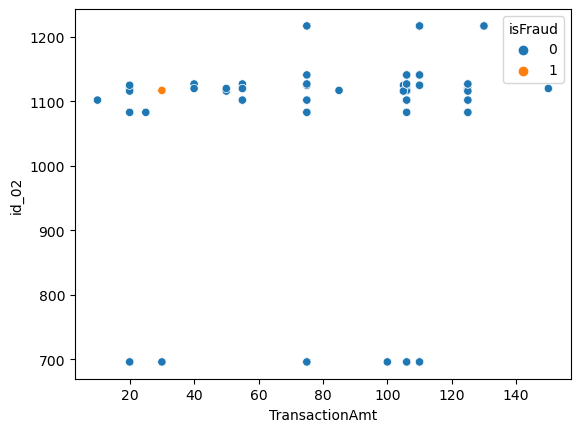

In [28]:
top_10_id_02 = df['id_02'].value_counts().head(10).index.tolist()

sns.scatterplot(x="TransactionAmt", y="id_02", hue="isFraud", data=df[df['id_02'].isin(top_10_id_02)])

plt.show()

In [29]:
# drop columns with more than 30% missing values in train
mis_val = df.isnull().sum()/len(df)

df.drop(columns = mis_val[mis_val > 0.3].index)

df.shape

(590540, 434)

In [30]:
def fill_missing_values(df):
    # Loop over each column in the dataframe
    for col in df.columns:
        if df[col].dtype == 'float64' or df[col].dtype == 'int64': # Check if column is numeric
            # Fill missing values with mean
            df[col].fillna(df[col].mean(), inplace=True)
        else:
            # Fill missing values with mode
            df[col].fillna(df[col].mode()[0], inplace=True)
    return df

In [31]:
# Fill missing values using the function
df_new = fill_missing_values(df)

## Machine Learning

In [32]:
from sklearn.preprocessing import LabelEncoder

def label_encode_features(df):
    le = LabelEncoder() # create a label encoder object
    
    for col in df.columns:
        if df[col].dtype == 'object': # check if column is of type 'object'
            df[col] = le.fit_transform(df[col].astype(str)) # label encode the column
            
    return df

In [33]:
# Label encode the object-type features using the function
new_df = label_encode_features(df_new)

In [34]:
new_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,24.000000,68.5,4,13926,362.555488,150.0,1,142.0,...,47,26.508597,132,3,1,0,1,0,0,1598
1,2987001,0,24.000278,29.0,4,2755,404.000000,150.0,2,102.0,...,47,26.508597,132,3,1,0,1,0,0,1598
2,2987002,0,24.019167,59.0,4,4663,490.000000,150.0,3,166.0,...,47,26.508597,132,3,1,0,1,0,0,1598
3,2987003,0,24.027500,50.0,4,18132,567.000000,150.0,2,117.0,...,47,26.508597,132,3,1,0,1,0,0,1598
4,2987004,0,24.029444,50.0,1,4497,514.000000,150.0,2,102.0,...,123,32.000000,164,3,1,0,1,1,1,954


In [35]:
# scaling the dataset 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(new_df)
scaled_new_df = scaler.transform(new_df)
scaled_new_df = pd.DataFrame(scaled_new_df, columns= new_df.columns)
scaled_new_df.sample(3)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
2118,0.003587,0.0,0.003591,0.005032,1.0,0.848298,0.444000,0.381679,1.0,0.693431,...,0.364341,0.828394,0.509653,1.0,1.0,0.0,1.0,0.0,0.0,0.895238
11209,0.018981,0.0,0.015723,0.003404,1.0,0.826167,0.282000,0.381679,1.0,0.919708,...,0.364341,0.828394,0.509653,1.0,1.0,0.0,1.0,0.0,0.0,0.895238
231986,0.392838,1.0,0.344517,0.007069,1.0,0.644918,0.525111,0.381679,1.0,0.481752,...,0.364341,0.828394,0.509653,1.0,1.0,0.0,1.0,0.0,0.0,0.895238


In [36]:
from sklearn.model_selection import train_test_split

#separate target from features
X = scaled_new_df.drop(columns=['isFraud','TransactionID'])
y = scaled_new_df['isFraud']

#split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [37]:
# smote the dataset to handle imbalance class 
smote = SMOTE(random_state=42)
x_trained,y_trained = smote.fit_resample(X_train, y_train)
del X_train, y_train

print(pd.value_counts(y_trained))

0.0    398836
1.0    398836
Name: isFraud, dtype: int64


In [38]:
# Random Forest Classifier
model = RandomForestClassifier()
model = model.fit(x_trained,y_trained)

In [39]:
#predict the model
y_pred = model.predict(X_test)

In [40]:
# Model Accuracy
print("Accuracy Random Forest Classifier:", metrics.accuracy_score(y_test, y_pred))

Accuracy Random Forest Classifier: 0.979363520393764


In [41]:
# Calculate feature importances
importances = model.feature_importances_
indices = importances.argsort()[::-1]

# Print the top n features and their importances
n = 10  # Number of top features to select
for i in range(n):
    print(f"{i+1}. {X.columns[indices[i]]}: {importances[indices[i]]:.4f}")

1. C14: 0.0316
2. C13: 0.0301
3. V294: 0.0200
4. V295: 0.0174
5. V280: 0.0153
6. V317: 0.0149
7. TransactionAmt: 0.0138
8. V97: 0.0136
9. D3: 0.0134
10. C4: 0.0133


In [42]:
# Select only the most important features
n = 10  # Number of top features to select

important_features = x_trained.columns[indices[:n]]

X_important = x_trained[important_features]

# Pass only the important features to the model
clf_important = RandomForestClassifier(random_state=0)

clf_important.fit(X_important, y_trained)

RandomForestClassifier(random_state=0)

In [43]:
result = clf_important.predict(X_important)

In [44]:
# Calculate the accuracy score
accuracy = accuracy_score(y_trained, result)

# Print the accuracy score
print(f"Accuracy: {accuracy}")

Accuracy: 0.9874522360067798


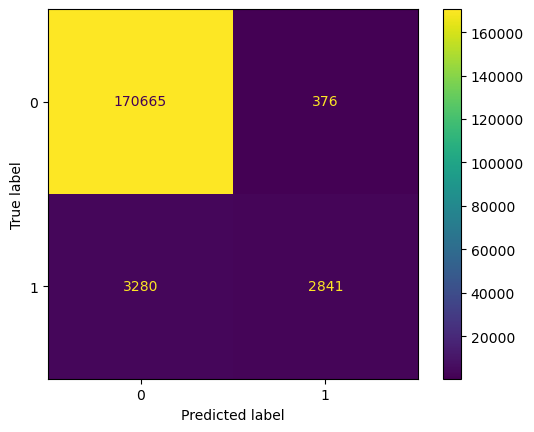

In [45]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [46]:
# classification report on test dataset
classif_rf = classification_report(y_test,y_pred)
print(classif_rf)

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    171041
         1.0       0.88      0.46      0.61      6121

    accuracy                           0.98    177162
   macro avg       0.93      0.73      0.80    177162
weighted avg       0.98      0.98      0.98    177162



In [ ]:
from sklearn.linear_model import LogisticRegression
modelLRC = LogisticRegression()
modelLRC.fit(X_important, y_trained)   #result_LRC

In [48]:
result_LRC = modelLRC.predict(X_important)

In [49]:
result_LRC

array([0., 1., 1., ..., 1., 0., 1.])

In [51]:
# Calculate the accuracy score
accuracy = accuracy_score(y_trained, result_LRC)

# Print the accuracy score
print(f"Accuracy: {accuracy}")

Accuracy: 0.6607089129366457


In [53]:
# Model Accuracy
print("Accuracy Logistic Regression:", metrics.accuracy_score(y_trained, result_LRC))

Accuracy Logistic Regression: 0.6607089129366457


'TransactionAmt', 'TransactionDT','card1',' C14','C13', 'card2', 'c8', 'addr1', 'V257', 'C1'

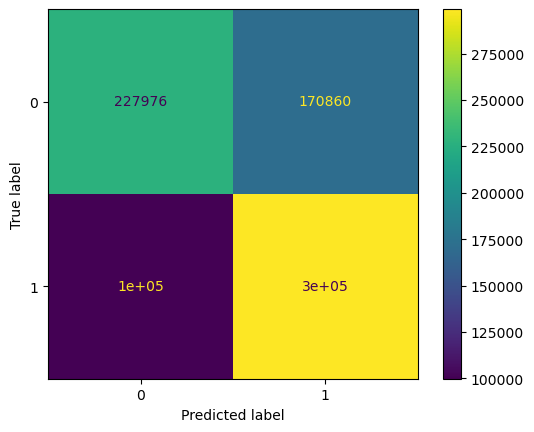

In [55]:
cm = confusion_matrix(y_trained, result_LRC)

ConfusionMatrixDisplay(cm).plot()

In [56]:
# classification report on test dataset
classif_lr = classification_report(y_trained, result_LRC)
print(classif_lr)

              precision    recall  f1-score   support

         0.0       0.70      0.57      0.63    398836
         1.0       0.64      0.75      0.69    398836

    accuracy                           0.66    797672
   macro avg       0.67      0.66      0.66    797672
weighted avg       0.67      0.66      0.66    797672



In [57]:
from sklearn.naive_bayes import GaussianNB
modelGNB = GaussianNB()
modelGNB.fit(x_trained, y_trained)
modelGNB.score(X_test, y_test)
gnb = modelGNB.predict(X_test)

In [58]:
# Model Accuracy
print("Accuracy Naive bayes:", metrics.accuracy_score(y_test,gnb))

Accuracy Naive bayes: 0.5189882706223682


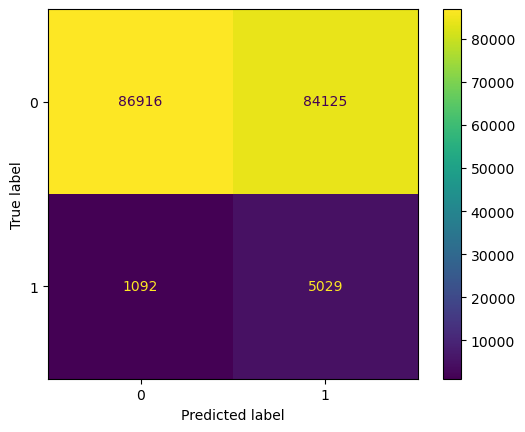

In [59]:
cm = confusion_matrix(y_test,gnb)
ConfusionMatrixDisplay(cm).plot()

In [60]:
# classification report on test dataset
classif_nb = classification_report(y_test, gnb)
print(classif_nb)

              precision    recall  f1-score   support

         0.0       0.99      0.51      0.67    171041
         1.0       0.06      0.82      0.11      6121

    accuracy                           0.52    177162
   macro avg       0.52      0.66      0.39    177162
weighted avg       0.96      0.52      0.65    177162



In [61]:
import pickle

# train your machine learning model
model = modelLRC

# save the model to a file
filename = '../deploy/my_model_saved.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)